In [1]:
import numpy as np
import sympy as sp
import math
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [2]:
a = 2
b = 2

h = 0.1
tau = 0.05
T = 4

gamma = tau / h

In [3]:
xs = np.arange(-a / 2, a / 2 + h, h)
ys = np.arange(-b / 2, b / 2 + h, h)
ts = np.arange(0, T + tau, tau)

nx = len(xs)
ny = len(ys)
nt = len(ts)

u = np.zeros((nt, ny, nx))

In [4]:
u[0, :] = 2 * np.cos(math.pi * xs / a)

In [5]:
for i in range(0, ny):
    for j in range(1, nx - 1):
        if i == 0:
            y_coeff = -2 * u[0, i, j] + 2 * u[0, i + 1, j]
        elif i == ny - 1:
            y_coeff = -2 * u[0, i, j] + 2 * u[0, i - 1, j]
        else:
            y_coeff = u[0, i - 1, j] - 2 * u[0, i, j] + u[0, i + 1, j]
            
        u[1, i, j] = u[0, i, j] + gamma**2 / 2 * (
            u[0, i, j - 1] - 2 * u[0, i, j] + u[0, i, j + 1] + \
            y_coeff 
        ) + tau * np.tan(np.sin(2 * math.pi * xs[j] / a)) * np.sin(math.pi * ys[i] / b)
        
#u[1, 0] = (u[1, 1] + u[1, 2]) / 2
#u[1, -1] = u[1, -2]

In [6]:
for t in range(2, nt):
    for i in range(0, ny):
        for j in range(1, nx - 1):
            if i == 0:
                y_coeff = -2 * u[t - 1, i, j] + 2 * u[t - 1, i + 1, j]
            elif i == ny - 1:
                y_coeff = -2 * u[t - 1, i, j] + 2 * u[t - 1, i - 1, j]
            else:
                y_coeff = u[t - 1, i - 1, j] - 2 * u[t - 1, i, j] + u[t - 1, i + 1, j]
                
            u[t, i, j] = 2 * u[t - 1, i, j] - u[t - 2, i, j] + gamma**2 * (
                u[t - 1, i, j - 1] - 2 * u[t - 1, i, j] + u[t - 1, i, j + 1] + y_coeff)
        
    #u[t, 0] = (u[t, 1] + u[t, 2]) / 2
    #u[t, -1] = u[t, -2]

In [7]:
def plot(u):
    x_grid, y_grid = np.meshgrid(xs, ys)

    surface = go.Surface(x=x_grid, y=y_grid, z=u)
    data = [surface]

    layout = go.Layout(
        title='Parametric Plot',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                title='t',
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            zaxis=dict(
                title='u(x, t)',
                gridcolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig, auto_open=True)

In [8]:
import time
#for i in range(0, 10):
#    plot(u[i])
#    time.sleep(0.5)
for i in range(0, nt, 30):
    plot(u[i])
    time.sleep(0.5)

<IPython.core.display.Javascript object>


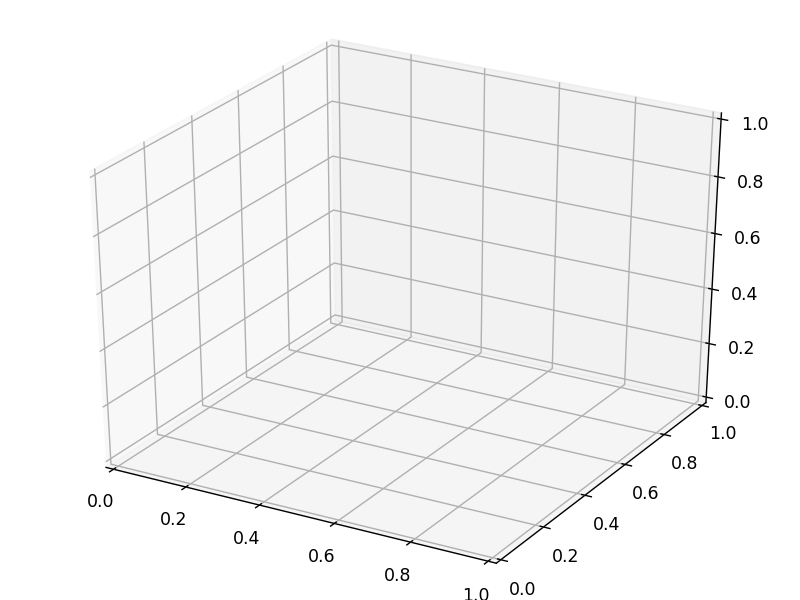

In [11]:
%matplotlib notebook
%matplotlib notebook

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

x_grid, y_grid = np.meshgrid(xs, ys)

fig = plt.figure() 
ax = p3.Axes3D(fig) 
line = ax.plot_surface(x_grid, y_grid, u[0])

# initialization function: plot the background of each frame 
def init(): 
    line = ax.plot_surface(x_grid, y_grid, u[0])
    return line, 

# animation function. This is called sequentially 
def animate(i): 
    ax.clear()
    line = ax.plot_surface(x_grid, y_grid, u[i])
    return line, 

ax.set_xlim3d([-a/2, a/2])
ax.set_xlabel('X')

ax.set_ylim3d([-b/2, b/2])
ax.set_ylabel('Y')

ax.set_zlim3d([-2.5, 2.5])
ax.set_zlabel('Z')

# call the animator. blit=True means only re-draw the parts that have changed. 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=800, interval=20, blit=True) 

plt.show()

Traceback (most recent call last):
  File "C:\Users\User-PC\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\User-PC\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\User-PC\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


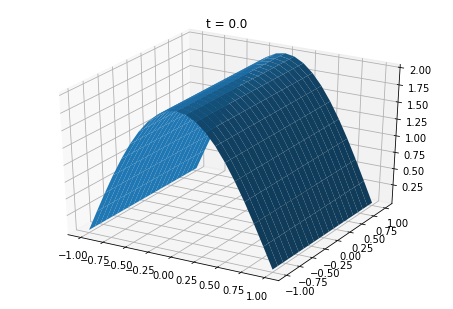

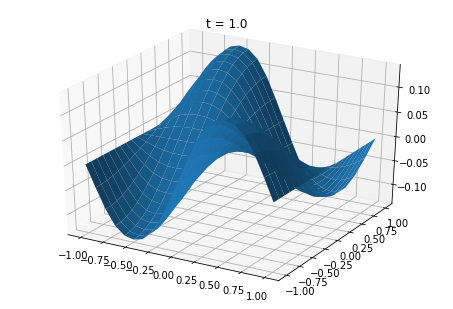

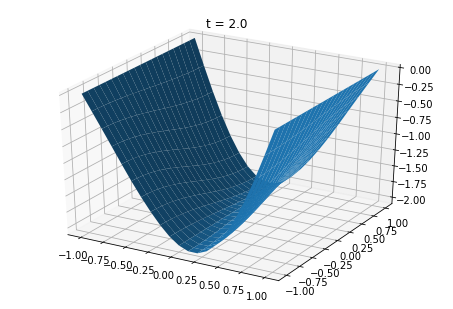

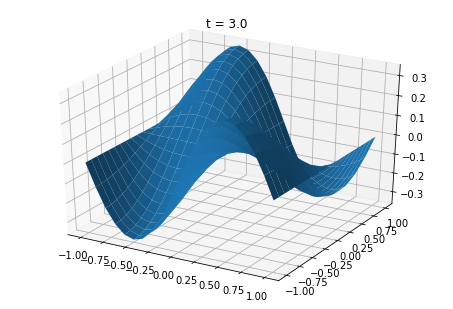

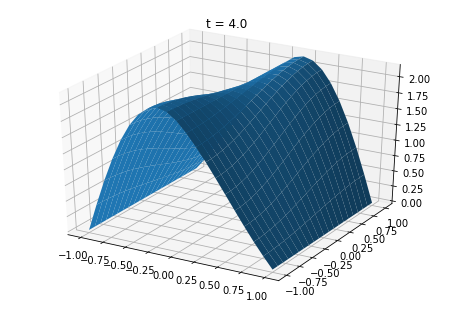

In [10]:
%matplotlib inline

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

x_grid, y_grid = np.meshgrid(xs, ys)



for i in range(0, nt, 20): 
    fig = plt.figure() 
    ax = p3.Axes3D(fig) 
    ax.clear()
    plt.title('t = {}'.format(ts[i]))
    line = ax.plot_surface(x_grid, y_grid, u[i])
    plt.show()